# DATA PREPROCESSING:

## LOADING THE DATASET:

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
df = pd.read_csv(r"C:\Users\windows\Downloads\Data.csv")

In [123]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


## SPLITTING DATASET INTO X AND Y:

In [124]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [125]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [126]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

## HANDLING MISSING DATA:

In [127]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])

In [128]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## ENCODING CATEGORICAL VARIABLES:

In [129]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])] , remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [130]:
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [132]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## SPLITTING INTO TAINING AND TESTING DATA:

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 1)

In [134]:
x_train

array([[0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [135]:
x_test

array([[0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [136]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 1])

In [137]:
y_test

array([0, 1])

## FEATURE SCALING:

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,3:] = sc.fit_transform(x_train[:,3:])
x_test[:,3:] = sc.transform(x_test[:,3:])

In [139]:
x_train

array([[0.0, 0.0, 1.0, -0.19159184384578545, -1.0781259408412425],
       [0.0, 1.0, 0.0, -0.014117293757057777, -0.07013167641635372],
       [1.0, 0.0, 0.0, 0.566708506533324, 0.633562432710455],
       [0.0, 0.0, 1.0, -0.30453019390224867, -0.30786617274297867],
       [0.0, 0.0, 1.0, -1.9018011447007988, -1.420463615551582],
       [1.0, 0.0, 0.0, 1.1475343068237058, 1.232653363453549],
       [0.0, 1.0, 0.0, 1.4379472069688968, 1.5749910381638885],
       [1.0, 0.0, 0.0, -0.7401495441200351, -0.5646194287757332]],
      dtype=object)

In [140]:
x_test

array([[0.0, 1.0, 0.0, -1.4661817944830124, -0.9069571034860727],
       [1.0, 0.0, 0.0, -0.44973664397484414, 0.2056403393225306]],
      dtype=object)

# SIMPLE LINEAR REGRESSION:

## IMPORTING THE DATASET:

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [142]:
df = pd.read_csv(r"C:\Users\windows\Downloads\Salary_Data.csv")

In [143]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## SPLITTING DATASET INTO X AND Y:

In [144]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## SPLITTING INTO TAINING AND TESTING DATA:

In [145]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

## TRAINING THE MODEL:

In [146]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## TESTING THE MODEL:

In [147]:
y_pred = regressor.predict(x_test)

In [148]:
y_pred

array([ 40748.96, 122699.62,  64961.66,  63099.14, 115249.56, 107799.5 ])

## VISUALIZING TRAINING DATA:

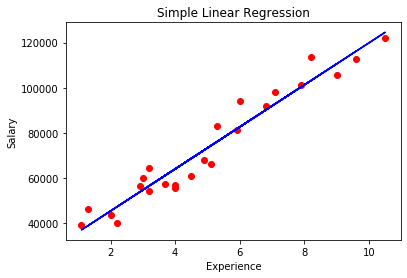

In [149]:
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,regressor.predict(x_train),color = 'blue')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression")
plt.show()

## VISUALIZING TESTING DATA:

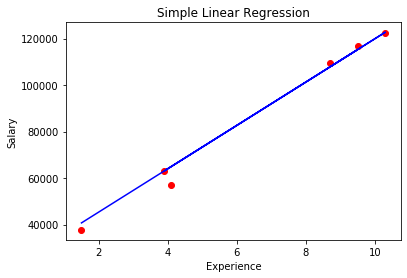

In [150]:
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,regressor.predict(x_test),color = 'blue')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression")
plt.show()

# MULTIPLE LINEAR REGRESSION:

## IMPORTING THE DATASET:

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [152]:
df = pd.read_csv(r"C:\Users\windows\Downloads\50_Startups.csv")

In [153]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## SPLITTING DATASET INTO X AND Y:

In [154]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## ENCODING CATEGORICAL VARIABLES:

In [155]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])] , remainder='passthrough')
x = np.array(ct.fit_transform(x))

## SPLITTING INTO TAINING AND TESTING DATA:

In [156]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)

## TRAINING THE MODEL:

In [157]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## TESTING THE MODEL:

In [158]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[103015.2 , 103282.38],
       [132582.28, 144259.4 ],
       [132447.74, 146121.95],
       [ 71976.1 ,  77798.83],
       [178537.48, 191050.39],
       [116161.24, 105008.31],
       [ 67851.69,  81229.06],
       [ 98791.73,  97483.56],
       [113969.44, 110352.25],
       [167921.07, 166187.94]])

# POLYNOMIAL LINEAR REGRESSSION
This is a special case of multiple linear regression

## IMPORTING THE DATASET:

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [160]:
df = pd.read_csv(r"C:\Users\windows\Downloads\Position_Salaries.csv")

In [161]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## SPLITTING DATASET INTO X AND Y:

In [162]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

## TRAINING THE MODELS:

In [163]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## TESTING THE MODELS:

In [165]:
lin_reg.predict(x)

array([-124490.91,  -44448.48,   35593.94,  115636.36,  195678.79,
        275721.21,  355763.64,  435806.06,  515848.48,  595890.91])

In [166]:
lin_reg_2.predict(x_poly)

array([133781.82,  41642.42,  -7451.52, -13500.  ,  23496.97, 103539.39,
       226627.27, 392760.61, 601939.39, 854163.64])

## VISUALIZING LINEAR REGRESSION DATA:

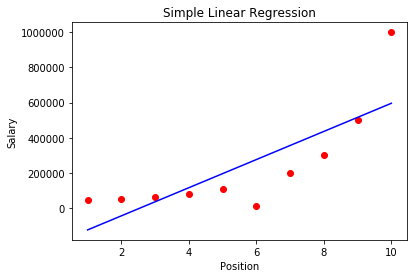

In [167]:
plt.scatter(x,y,color = "red")
plt.plot(x,lin_reg.predict(x),color="blue")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.title("Simple Linear Regression")
plt.show()

## VISUALIZING POLYNOMIAL LINEAR REGRESSION DATA:

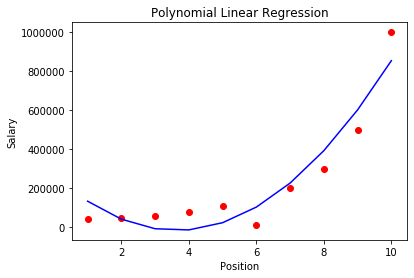

In [168]:
plt.scatter(x,y,color = "red")
plt.plot(x,lin_reg_2.predict(x_poly),color="blue")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.title("Polynomial Linear Regression")
plt.show()

## POLYNOMIAL REGRESSION WITH DEGREE FOUR: 

In [169]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,y)
plt.show()

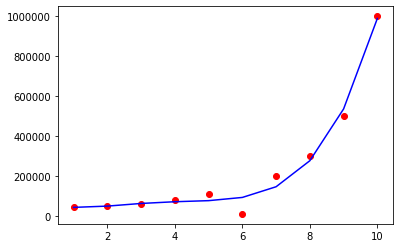

In [170]:
plt.scatter(x,y,color = "red")
plt.plot(x,lin_reg_2.predict(x_poly),color="blue")
plt.show()

## USER INPUT PREDICTION:

In [171]:
lin_reg.predict([[6.5]])

array([315742.42])

In [172]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([114267.28])

# SUPPORT VECTOR REGRESSSION

## IMPORTING THE DATASET:

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [174]:
df = pd.read_csv(r"C:\Users\windows\Downloads\Position_Salaries.csv")

In [175]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## SPLITTING DATASET INTO X AND Y:

In [176]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [177]:
y = y.reshape(len(y),1)

In [178]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [179]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

C:\Users\windows\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [180]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([129342.08])

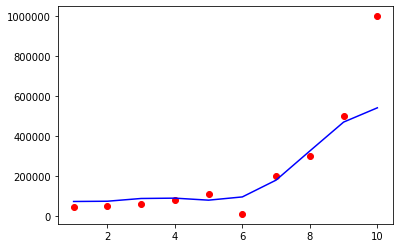

In [181]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color = "red")
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)),color="blue")
plt.show()

# DECISION TREES:

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
df = pd.read_csv(r"C:\Users\windows\Downloads\Position_Salaries.csv")

In [184]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [185]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [186]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [187]:
regressor.predict([[6.5]])

array([12000.])